# HRISHIKESH G KULKARNI - 21BAI1660
### hrishikesh.gkulkarni2021@vitstudent.ac.in

### ASSIGNMENT - 05

### Downloaded the dataset from the given link!

#### import needed libraries

In [87]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the Dataset

In [88]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [89]:
df = df.drop(columns=['CustomerID'])
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [90]:
df.shape

(200, 4)

In [91]:
df['Spending Score (1-100)'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Spending Score (1-100), Length: 84, dtype: int64

In [92]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Annual Income (k$), Length: 64, dtype: int64

### 2. Data PreProcessing including Visualizations 

### Univariate 

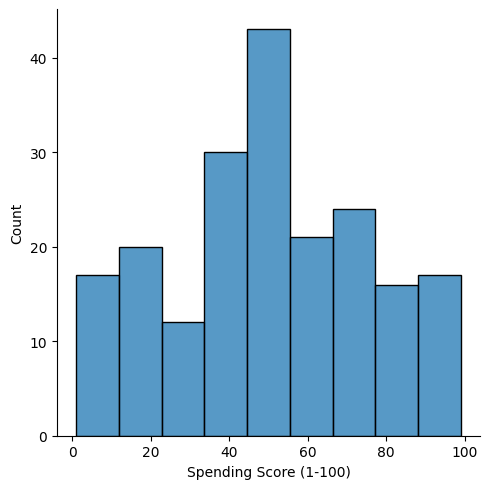

In [93]:
sns.displot(df['Spending Score (1-100)'])

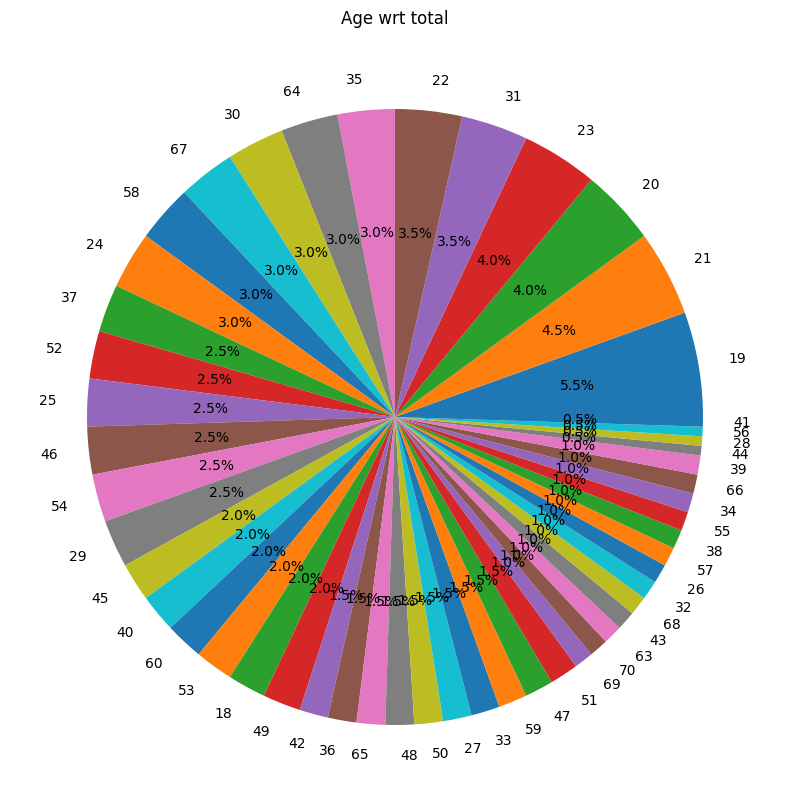

In [94]:
plt.figure(figsize=(10,10))
plt.pie(df["Age"].value_counts(), labels = df["Age"].unique(),autopct ='%1.1f%%')
plt.title('Age wrt total')
plt.show()

C:\Users\hrish\AppData\Local\Temp\ipykernel_4356\3737231236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])


<AxesSubplot: xlabel='Spending Score (1-100)', ylabel='Density'>

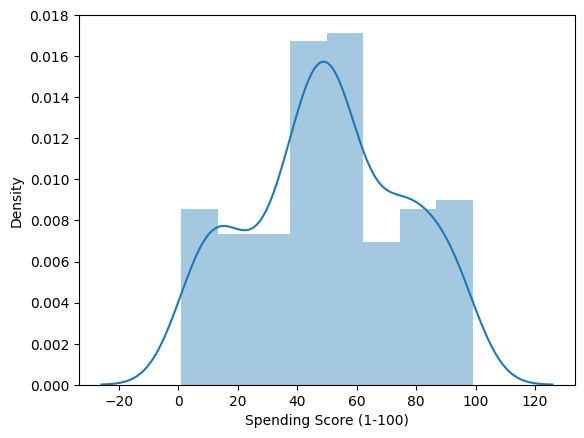

In [95]:
sns.distplot(df['Spending Score (1-100)'])

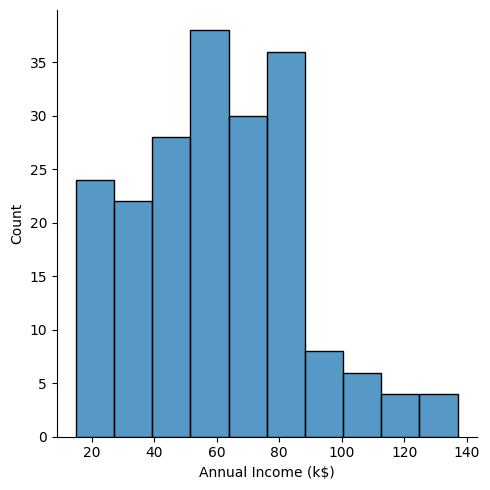

In [96]:
sns.displot(df['Annual Income (k$)'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


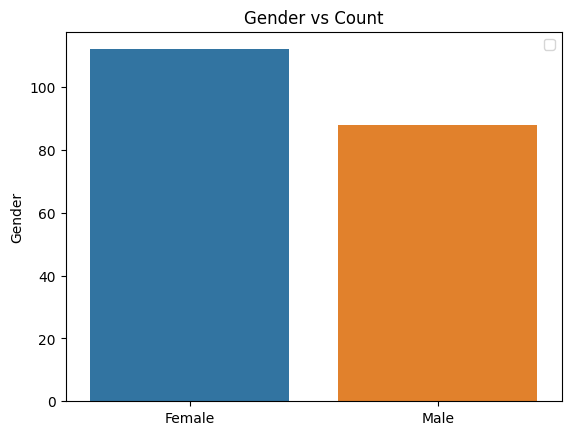

In [97]:
sns.barplot(x =df["Gender"].value_counts().index,y =df["Gender"].value_counts())
plt.title('Gender vs Count')
plt.legend()
plt.show()

### Bivariate

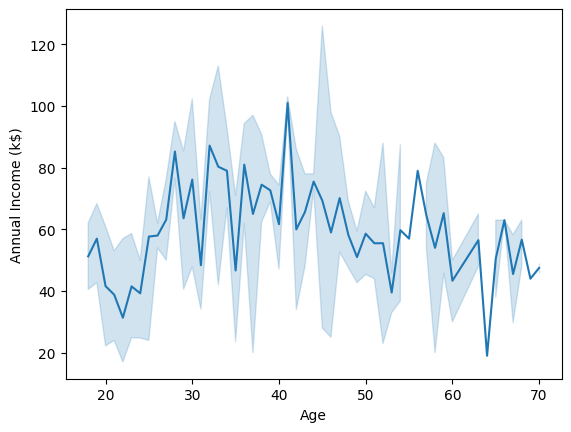

In [98]:
sns.lineplot(x='Age', y='Annual Income (k$)', data=df)
plt.show()

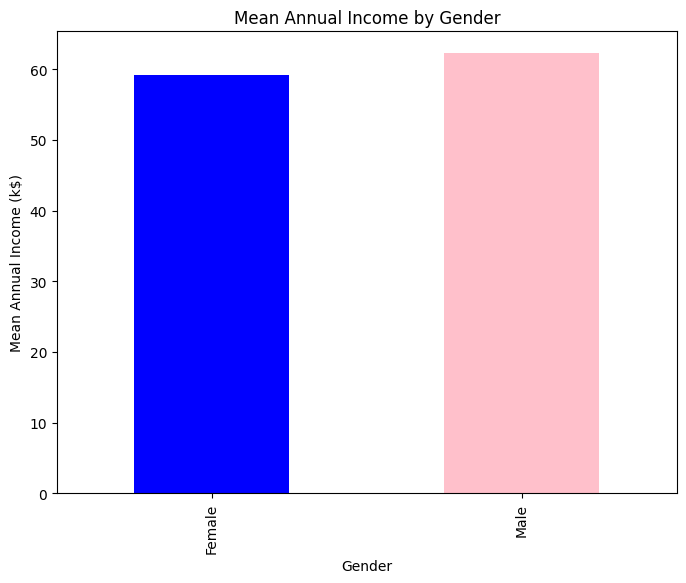

In [99]:
grouped_data = df.groupby('Gender')['Annual Income (k$)'].mean()
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Mean Annual Income (k$)')
plt.title('Mean Annual Income by Gender')
plt.show()

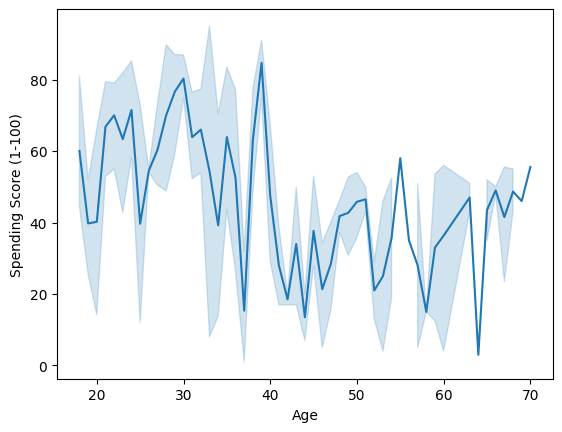

In [100]:
sns.lineplot(x='Age', y='Spending Score (1-100)', data=df)
plt.show()

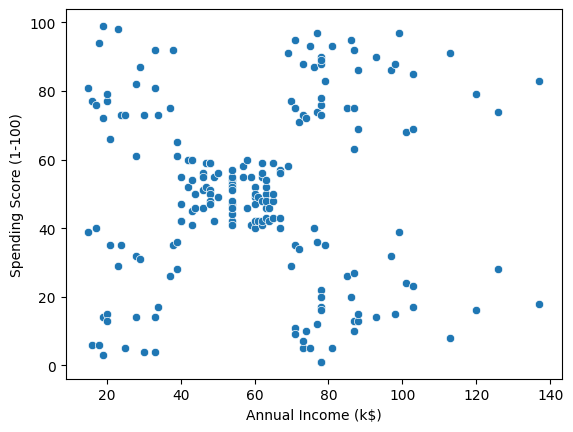

In [101]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.show()

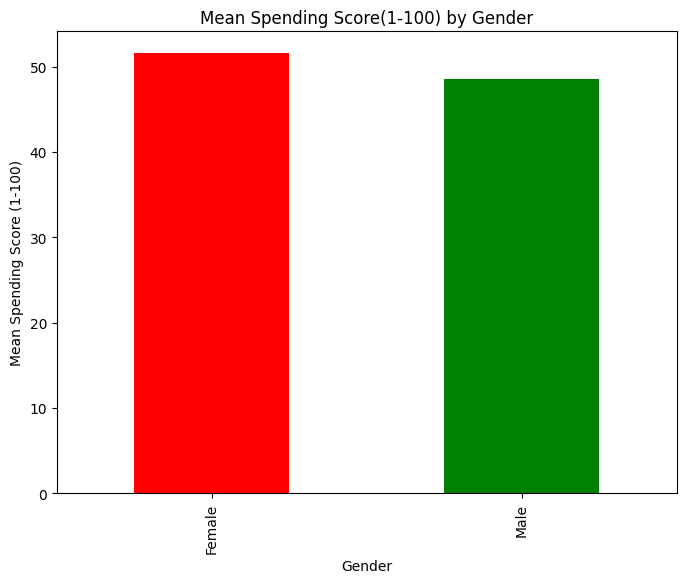

In [102]:
grouped_data = df.groupby('Gender')['Spending Score (1-100)'].mean()
plt.figure(figsize=(8, 6))
grouped_data.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Gender')
plt.ylabel('Mean Spending Score (1-100)')
plt.title('Mean Spending Score(1-100) by Gender')
plt.show()

### Multivariate

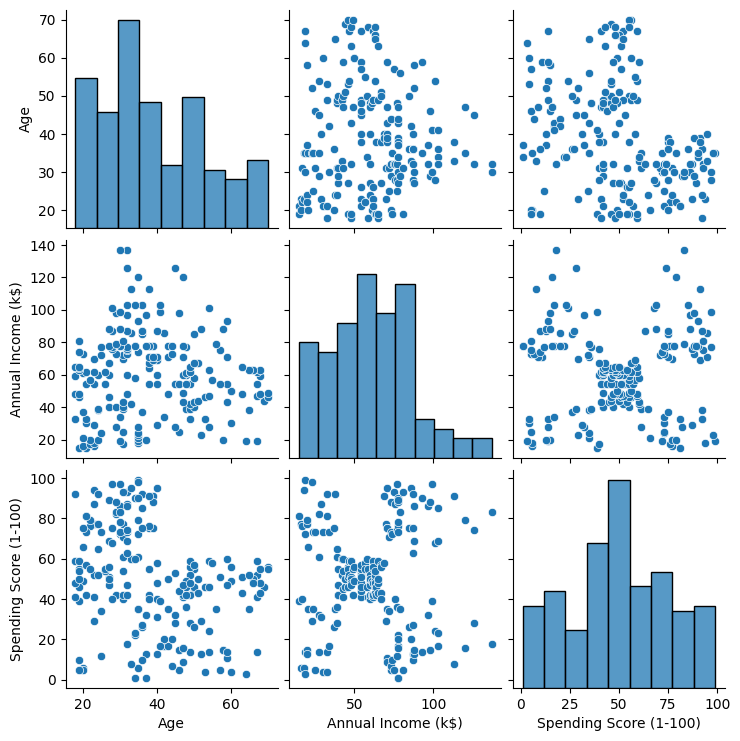

In [103]:
sns.pairplot(df)

<AxesSubplot: >

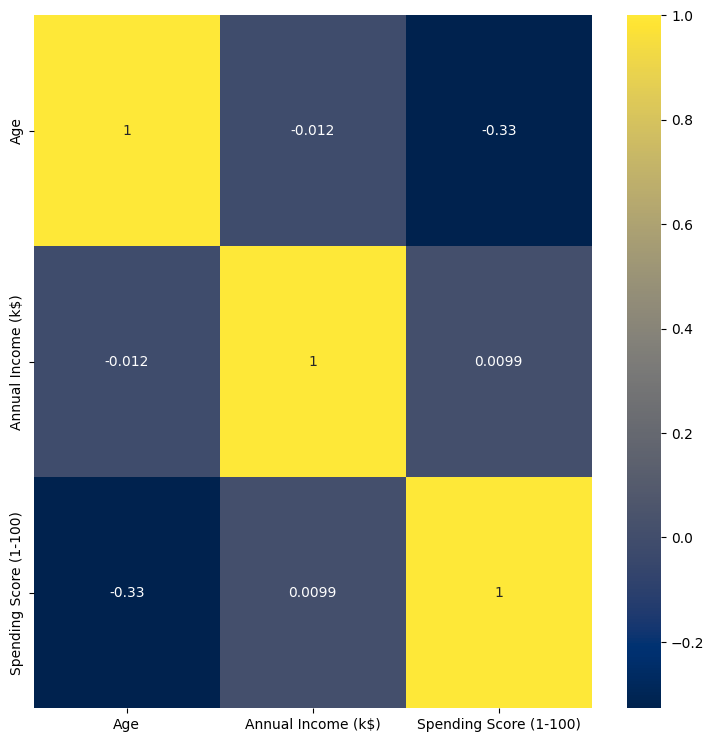

In [104]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), annot=True, cmap='cividis')

#### Preprocessing

In [105]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [107]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

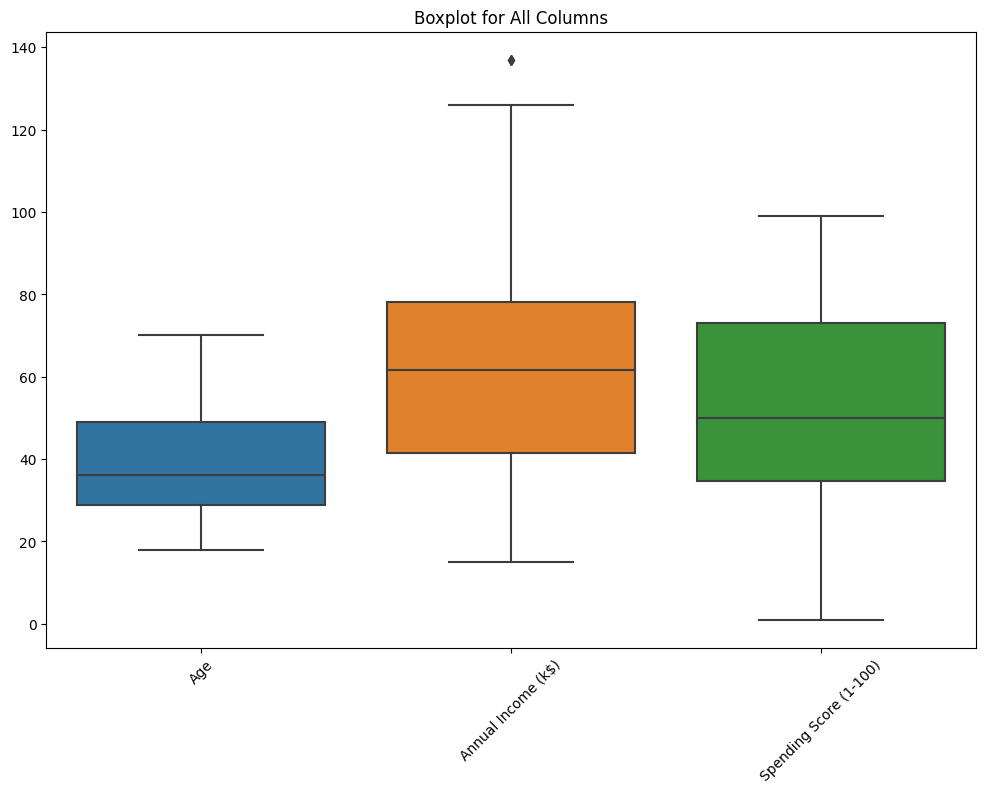

In [108]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot for All Columns')
plt.show()

In [109]:
q1=df['Annual Income (k$)'].quantile(0.25)
q3=df['Annual Income (k$)'].quantile(0.75)
iqr=q3-q1
upperL=q3+1.5*iqr
lowerL=q1-1.5*iqr
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upperL,upperL,np.where(df['Annual Income (k$)']<lowerL,lowerL,df['Annual Income (k$)']))

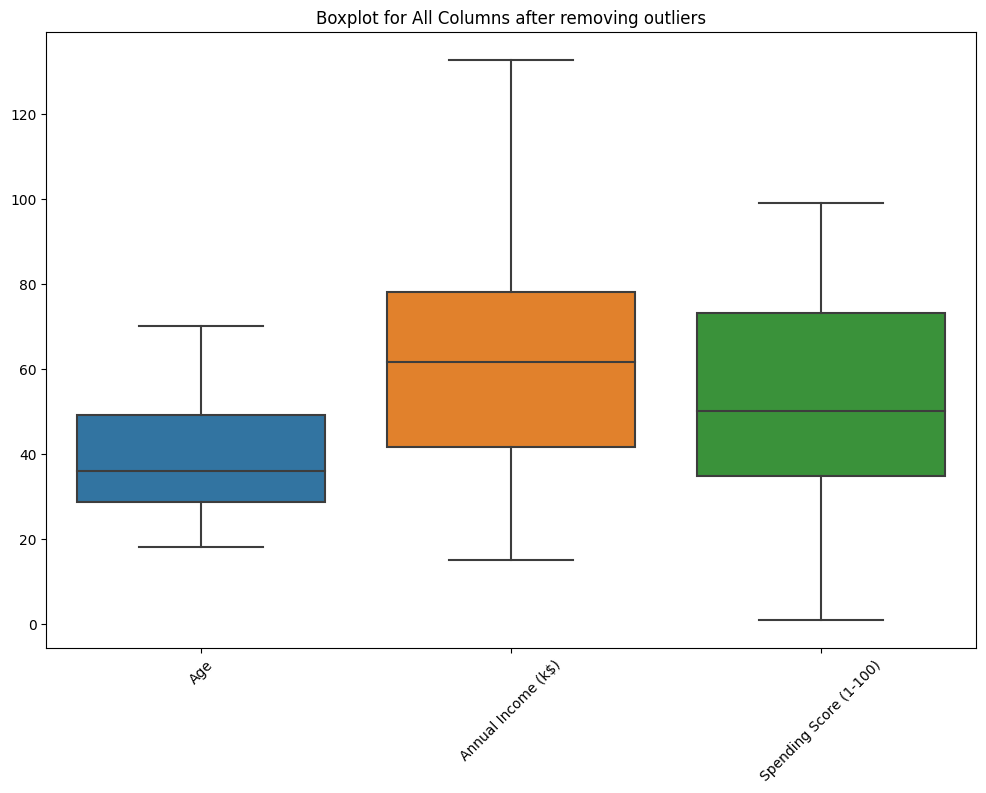

In [110]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplot for All Columns after removing outliers')
plt.show()

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40
5,0,22,17.0,76
6,0,35,18.0,6
7,0,23,18.0,94
8,1,64,19.0,3
9,0,30,19.0,72


In [112]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df_scaled= pd.DataFrame(scale.fit_transform(df),columns=df.columns)
df_scaled.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


### 3. ML Model Building, optimising

#### Clustering based by considering all columns -> Gender, Age, Annual Income, Spending Score and creating Clusters(Groups)

c:\Users\hrish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hrish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hrish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\hrish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

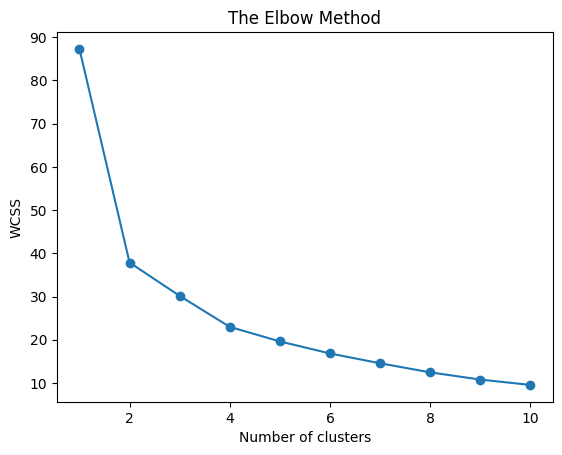

In [113]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker="o")
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [116]:
kmeans = KMeans(n_clusters=4,init = 'k-means++',random_state=0)
pred = kmeans.fit(df_scaled)

c:\Users\hrish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

### 4. Test with random Observation

In [123]:
kmeans.predict([[1,23,17,40]])

c:\Users\hrish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([3])

In [124]:
kmeans.predict([[0,25,10,23]])

c:\Users\hrish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [125]:
kmeans.predict([[0,20,20,10]])

c:\Users\hrish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0])

## Completed - HRISHIKESH G KULKARNI (21BAI1660)
##### assignment05 completed
### hrishikesh.gkulkarni2021@vitstudent.ac.in

### ==================================X===============================